In [130]:
import numpy as np
import matplotlib.pyplot as plt

## Jacobi iteration

### b)
Implement the jacobi iterator and define an exit condition. For the same examples as in the FTCS-part:
- How many iteration?
- Show the final states

\begin{align}
&\partial_tp(t,r)& &= D\nabla^2p(t,r) \\
\mathrm{ stationary} \Rightarrow &\partial_tp(t,r)& &= 0 \\
&p_{i,j} & &= \frac{1}{4}(p_{i+1,j}+p_{i-1,j}+p_{i,j+1}+p_{i,l-1})
\end{align}

In [131]:
def jacobi(phi, bound, maxiter=100, tol=1e-6, Lx=1, Ly=1):

    def step(A_in, bound):
        A = np.zeros((nx + 2, ny + 2))
        A[1:-1, 1:-1] = A_in.copy()
        A = bound(A, x=x, y=y)
        return 0.25 * (
            A[:-2, 1:-1] + A[2:, 1:-1] + A[1:-1, :-2] + A[1:-1, 2:]
        )  # Explaination in the image below

    nx, ny = phi.shape
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    A = step(phi, bound)
    Aprime = step(A, bound)
    iter = 2
    while (np.linalg.norm(A - Aprime) > tol) and (iter < maxiter):
        A = Aprime
        Aprime = step(A, bound)
        iter += 1
        yield Aprime[1:-1, 1:-1]

<img src="img1.jpg" width="1600" height="900">

In [132]:
def b1(A, **kwargs):
    # periodic boundary conditions
    A[0, :] = A[-2, :]  # left
    A[-1, :] = A[1, :]  # right
    A[:, 0] = A[:, -2]  # bottom
    A[:, -1] = A[:, 1]  # top
    return A


def b2(A, **kwargs):
    # periodic x, constant y
    A[0, :] = A[-2, :]  # left
    A[-1, :] = A[1, :]  # right
    A[:, 0] = 20  # bottom
    A[:, -1] = 10  # top
    return A


def b3(A, x, **kwargs):
    # periodic x , y = f(x)
    A[0, :] = A[-2, :]  # left
    A[-1, :] = A[1, :]  # right
    A[1:-1, 0] = (
        10 - 0.3 * (x - 5) ** 2
    )  # bottom, x has the length nx, A has the length nx+2
    A[1:-1, -1] = 10 + 0.5 * (x - 5) ** 2  # top
    return A


def b4(A, x, y, **kwargs):
    A = b2(A, **kwargs)
    # add square sink
    X, Y = np.meshgrid(x, y, indexing="ij")
    mask = (1.5 < X) & (X < 3.5) & (1.5 < Y) & (Y < 3.5)
    A[1:-1, 1:-1][mask] = 0
    return A

In [133]:
Lx = 10
Ly = 5
dL = 0.1
shape = (int(Lx // dL), int(Ly // dL))

np.random.seed(42)
phi = (
    np.random.rand(*shape) * 10
)  # When using a constant field, b1 is already stationary

jacobi1 = jacobi(phi, b1, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi2 = jacobi(phi, b2, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi3 = jacobi(phi, b3, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi4 = jacobi(phi, b4, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)

dif1 = np.array([A for A in jacobi1])
dif2 = np.array([A for A in jacobi2])
dif3 = np.array([A for A in jacobi3])
dif4 = np.array([A for A in jacobi4])

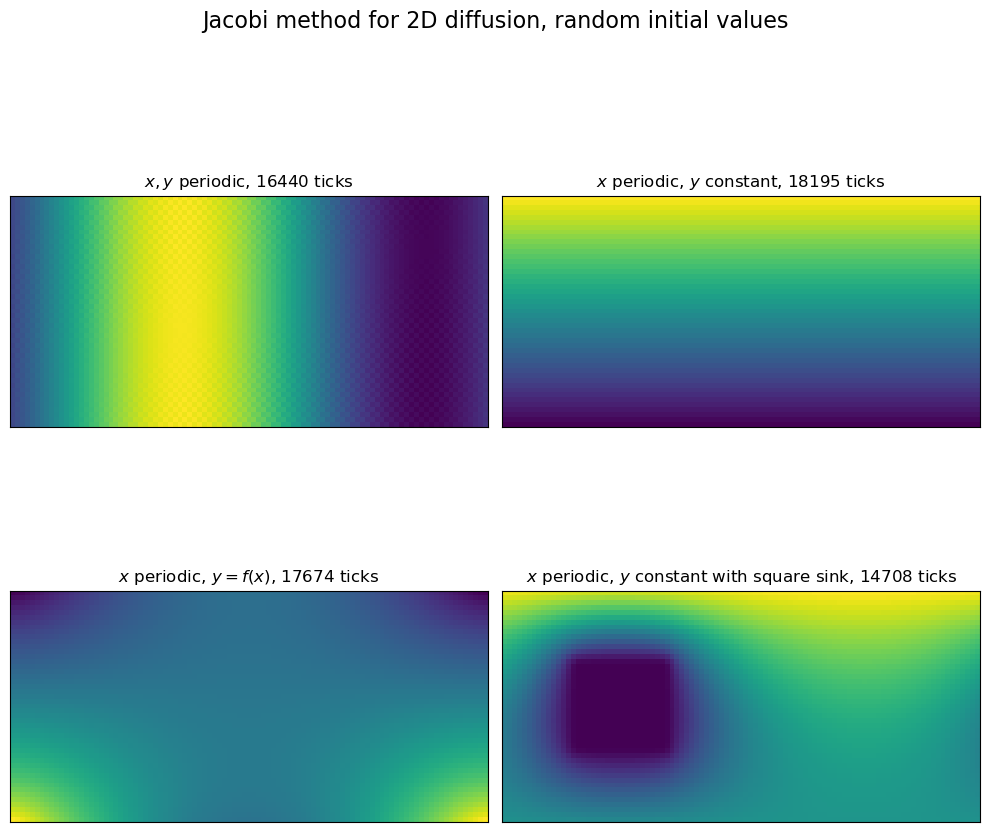

In [134]:
titles = [
    "$x,y$ periodic",
    "$x$ periodic, $y$ constant",
    "$x$ periodic, $y = f(x)$",
    "$x$ periodic, $y$ constant with square sink",
]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for axi, difi, title in zip(ax.flat, [dif1, dif2, dif3, dif4], titles):
    axi.imshow(difi[-1].T, cmap="viridis")
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_title(title + f", {len(difi)} ticks")
fig.suptitle("Jacobi method for 2D diffusion, random initial values", fontsize=16)
fig.tight_layout()

### c) / d)
Solve for a delta peak as inital value. Fix the problem

In [135]:
Lx = 10
Ly = 5
dL = 0.1
np.random.seed(1337)
phi = np.zeros(shape)
x_peak = np.random.uniform(shape[0])
y_peak = np.random.uniform(shape[1])
peak_val = 1e16
phi[int(x_peak), int(y_peak)] = peak_val

jacobi1 = jacobi(phi, b1, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi2 = jacobi(phi, b2, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi3 = jacobi(phi, b3, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)
jacobi4 = jacobi(phi, b4, Lx=Lx, Ly=Ly, maxiter=1e6, tol=1e-8)

dif1 = np.array([A for A in jacobi1])
dif2 = np.array([A for A in jacobi2])
dif3 = np.array([A for A in jacobi3])
dif4 = np.array([A for A in jacobi4])

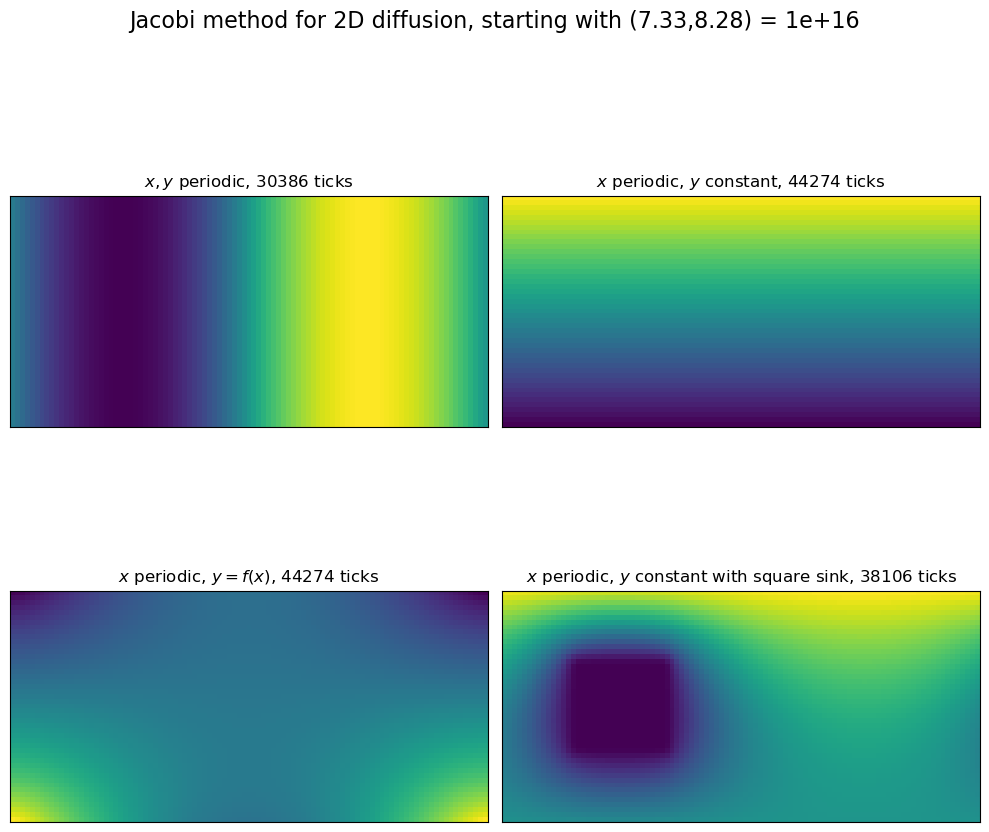

In [136]:
titles = [
    "$x,y$ periodic",
    "$x$ periodic, $y$ constant",
    "$x$ periodic, $y = f(x)$",
    "$x$ periodic, $y$ constant with square sink",
]

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for axi, difi, title in zip(ax.flat, [dif1, dif2, dif3, dif4], titles):
    axi.imshow(difi[-1].T, cmap="viridis")
    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_title(title + f", {len(difi)} ticks")
fig.suptitle(
    f"Jacobi method for 2D diffusion, starting with ({(x_peak/Lx):.2f},{(y_peak/Ly):.2f}) = {peak_val}",
    fontsize=16,
)
fig.tight_layout()

Sadly this method does converge, as no generator has exited due to reaching `maxiter`.